In [1]:
import tabula
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from astropy import units as u
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import math

C:\Users\Ye Sheng\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
file_path = 'C:/Users/Ye Sheng/Desktop/Courses/Professional Trading Masterclass (PTM) by Anton Kreil/PTM -Video 4 Excel Resources/Raw data/'
# For S&P 500 data
# data = pd.read_csv(file_path + 'S&P500_monthly.csv')
data = pd.read_csv( file_path + 'S&P500_daily.csv')
# data = pd.read_csv(file_path + 'gold_daily.csv')
# data = pd.read_csv(file_path + 'Crude.csv')

In [3]:
data["Returns"] = (data['Close']-data['Open'])/data['Open']

             Date         Open         High          Low        Close  \
0      1970-08-31    81.860001    82.330002    80.949997    81.519997   
1      1970-09-01    81.519997    81.800003    80.430000    80.949997   
2      1970-09-02    80.949997    81.349998    79.949997    80.959999   
3      1970-09-03    80.959999    82.629997    80.879997    82.089996   
4      1970-09-04    82.089996    83.419998    81.790001    82.830002   
...           ...          ...          ...          ...          ...   
12607  2020-08-24  3418.090088  3432.090088  3413.129883  3431.280029   
12608  2020-08-25  3435.949951  3444.209961  3425.840088  3443.620117   
12609  2020-08-26  3449.969971  3481.070068  3444.149902  3478.729980   
12610  2020-08-27  3485.139893  3501.379883  3468.350098  3484.550049   
12611  2020-08-28  3494.689941  3509.229980  3484.320068  3508.010010   

         Adj Close      Volume   Returns   neg_ret   pos_ret  
0        81.519997    10740000 -0.004153 -0.004153       NaN

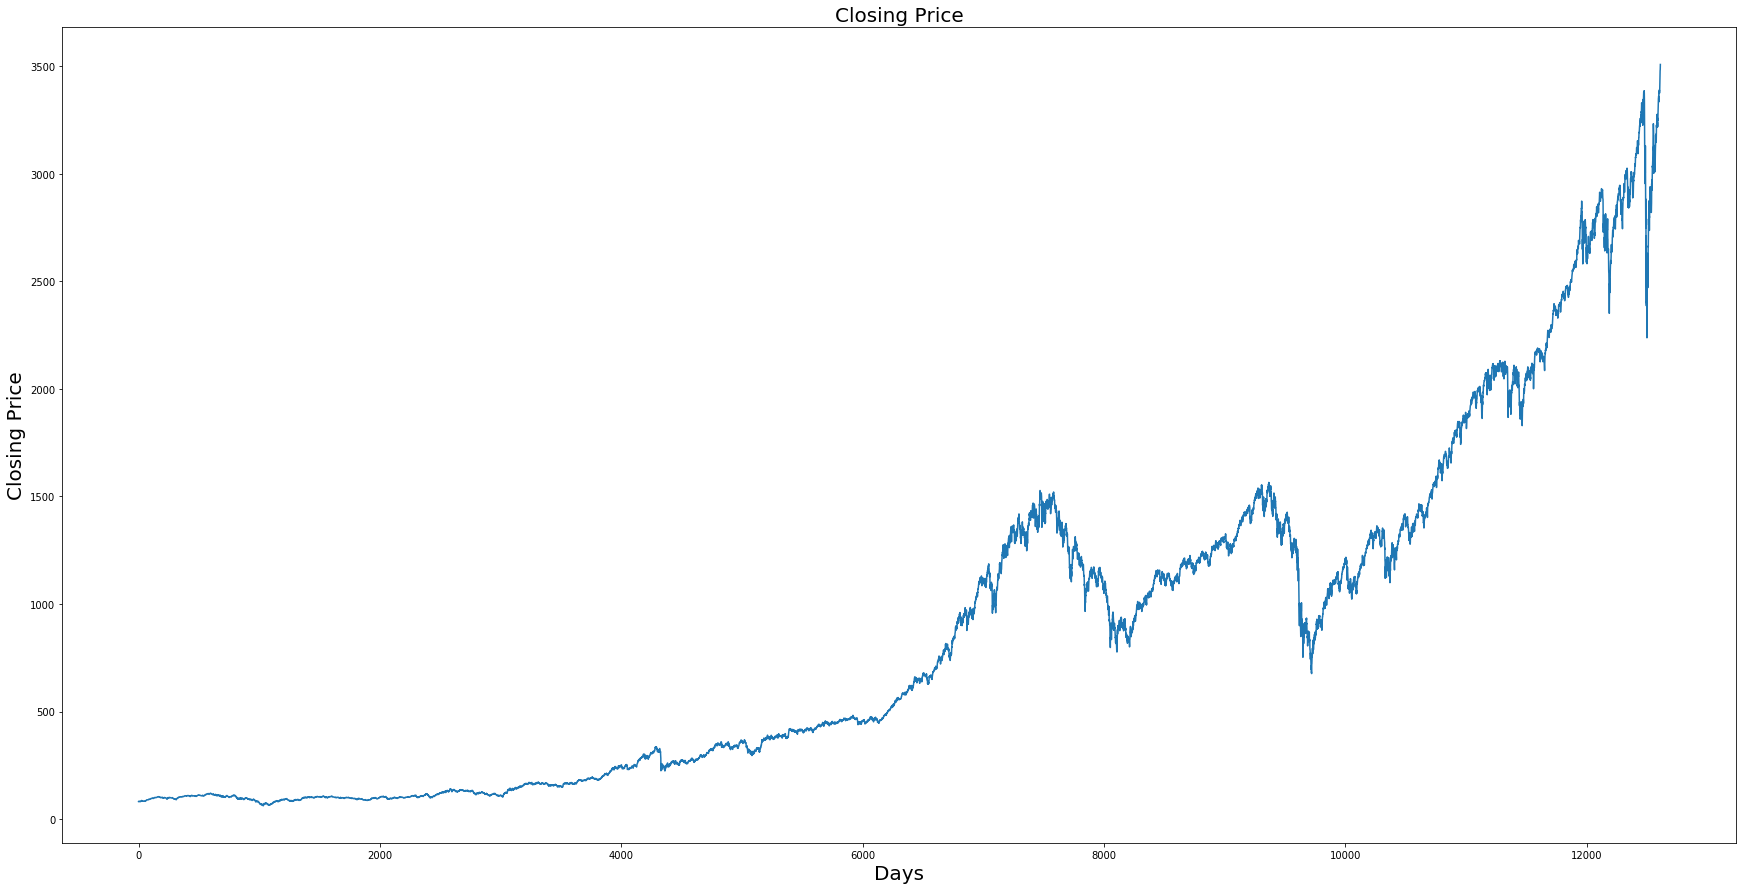

In [4]:
mask = data['Returns'] < 0
data['neg_ret'] = data['Returns'].mask(~mask)
data['pos_ret'] = data['Returns'].mask(mask)
print(data)
data_2 = data
plt.figure(figsize=(30,15))
plt.plot(data['Close'])
plt.title('Closing Price', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Closing Price', fontsize=20)
plt.show()

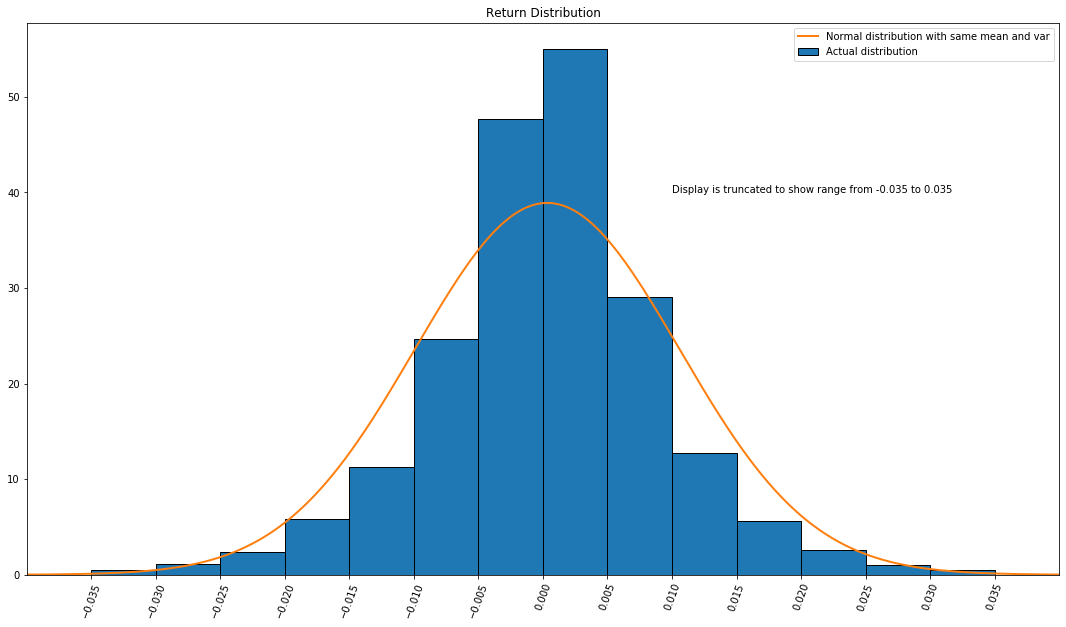

count    12612.000000
mean         0.000327
std          0.010257
min         -0.204669
25%         -0.004426
50%          0.000464
75%          0.005256
max          0.107890
Name: Returns, dtype: float64


In [5]:
data_hist = data['Returns']
data_hist = data_hist.dropna()
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(data_hist, edgecolor='black', 
                                bins = [-0.035,-0.03,-0.025,-0.02, -0.015, -0.010, -0.005, 0, 0.005, 0.010, 0.015, 0.02, 0.025,0.03,0.035],
                               density=True, label="Actual distribution")
data_hist = sorted(data_hist)
fit = stats.norm.pdf(data_hist, np.mean(data_hist), np.std(data_hist)) 
plt.xlim(-0.04, 0.04)
plt.plot(data_hist,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
plt.xticks(rotation=70)
plt.legend()
fig = plt.gcf()
plt.text(0.01,40,"Display is truncated to show range from -0.035 to 0.035")
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(bottom=0.15)
plt.title("Return Distribution")
plt.show()

counts, bins, patches = ax.hist(data_hist, edgecolor='black', 
                                bins = [-0.035,-0.03,-0.025,-0.02, -0.015, -0.010, -0.005, 0, 0.005, 0.010, 0.015, 0.02, 0.025,0.03,0.035],
                                label="Actual distribution")
print(data['Returns'].describe(include='all'))

In [6]:
df = pd.DataFrame(counts, columns=['Freq'])
df['Range'] = ['-0.035 to -0.03','-0.03 to -0.025', '-0.025 to -0.02', '-0.02 to -0.015', '-0.015 to -0.010',
               '-0.010 to -0.005','-0.05 to 0.00', '0.00 to 0.05', '0.005 to 0.010','0.010 to 0.015',
               '0.015 to 0.02', '0.02 to 0.025', '0.025 to 0.03' , '0.030 to 0.035' ]
df['Probabilities %'] = (df['Freq']/ data['Returns'].count())*100
df = df[['Range','Freq', 'Probabilities %']]
print(df)


               Range    Freq  Probabilities %
0    -0.035 to -0.03    31.0         0.245798
1    -0.03 to -0.025    71.0         0.562956
2    -0.025 to -0.02   149.0         1.181415
3    -0.02 to -0.015   364.0         2.886140
4   -0.015 to -0.010   705.0         5.589914
5   -0.010 to -0.005  1543.0        12.234380
6      -0.05 to 0.00  2979.0        23.620362
7       0.00 to 0.05  3435.0        27.235966
8     0.005 to 0.010  1812.0        14.367269
9     0.010 to 0.015   798.0         6.327307
10     0.015 to 0.02   348.0         2.759277
11     0.02 to 0.025   159.0         1.260704
12     0.025 to 0.03    66.0         0.523311
13    0.030 to 0.035    34.0         0.269585


In [7]:
avr_ret = data["Returns"].mean()*100
avr_pos_ret = data["pos_ret"].mean()*100
avr_neg_ret = data["neg_ret"].mean()*100
pos_freq, neg_freq = data["pos_ret"].count(), data["neg_ret"].count()
pos_prob, neg_prob = (pos_freq/data["Returns"].count())*100, (neg_freq/data["Returns"].count())*100

ret_t = Table()
ret_t['--'] = ['Avr Pos', 'Avr Neg', 'Total Avr Ret'] 
ret_t['Returns %'] = [avr_pos_ret, avr_neg_ret, avr_ret]
ret_t['Frequency'] = [pos_freq, neg_freq, data["Returns"].count()]
ret_t['Frequency %'] = [pos_prob, neg_prob, 'NA']
ret_t['Av Ret * Freq (%)'] = [(avr_pos_ret*pos_prob)/(100), (avr_neg_ret*neg_prob)/(100), 'NA']
ret_t

--,Returns %,Frequency,Frequency %,Av Ret * Freq (%)
str13,float64,int32,str32,str32
Avr Pos,0.6851385197053962,6712,53.21915635902316,0.3646249400779115
Avr Neg,-0.7095194102954162,5900,46.78084364097685,-0.3319191659326796
Total Avr Ret,0.03270577414522943,12612,NA,NA


In [8]:
#Extracting SD and confidence interval
std = np.std(data['Returns'])
mean = np.mean(data['Returns'])
total_cnt = data["Returns"].count()
mask_std1 = ((mean - std) <= data['Returns']) & (data['Returns']<= (mean + std))
mask_std2 = ((mean - 2*std)<= data['Returns']) & (data['Returns']<= (mean + 2*std))
mask_std3 = ((mean - 3*std)<= data['Returns']) & (data['Returns']<= (mean + 3*std))
cnt_std1 = data['Returns'].mask(~mask_std1).dropna().count()
cnt_std2 = data['Returns'].mask(~mask_std2).dropna().count()
cnt_std3 = data['Returns'].mask(~mask_std3).dropna().count()

std_t = Table()
std_t['Std Dev'] = [1, 2, 3 ]
std_t['Actual'] = [cnt_std1, cnt_std2, cnt_std3]
std_t['Normal'] = [round(total_cnt*0.6826 ), round(total_cnt*0.9546), round(total_cnt*0.9972)]
std_t['Actual %'] = [round((cnt_std1/total_cnt)*100, 2),round((cnt_std2/total_cnt)*100,2), round((cnt_std3/total_cnt)*100, 2) ]
std_t['Normal %'] = [68.26, 95.46, 99.72]
std_t['Range %'] = [str(round((mean - std)*100,3)) + ' <x< ' + str(round((mean + std)*100, 3)) ,
                   str(round((mean - 2*std)*100,3)) + ' <x< ' + str(round((mean + 2*std)*100, 3)),
                   str(round((mean - 3*std)*100,3)) + ' <x< ' + str(round((mean + 3*std)*100, 3))]


std_t

Std Dev,Actual,Normal,Actual %,Normal %,Range %
int32,int32,float64,float64,float64,str16
1,9885,8609.0,78.38,68.26,-0.993 <x< 1.058
2,12016,12039.0,95.27,95.46,-2.019 <x< 2.084
3,12439,12577.0,98.63,99.72,-3.044 <x< 3.11


## Calculating Average True Range

In [15]:
data_atr = data[['Date', 'Open', 'High', 'Low']]
data_atr['True Range'] = (data_atr['High']) - (data_atr['Low'])
data_atr["1-D ATR %"] = ((data_atr['True Range'].rolling(2).sum()/2)/data_atr['Open'])*100 
data_atr

C:\Users\Ye Sheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ye Sheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,True Range,1-D ATR %
0,1970-08-31,81.860001,82.330002,80.949997,1.380005,NaN
1,1970-09-01,81.519997,81.800003,80.430000,1.370003,1.686708
2,1970-09-02,80.949997,81.349998,79.949997,1.400001,1.710935
3,1970-09-03,80.959999,82.629997,80.879997,1.750000,1.945406
4,1970-09-04,82.089996,83.419998,81.790001,1.629997,2.058714
...,...,...,...,...,...,...
12607,2020-08-24,3418.090088,3432.090088,3413.129883,18.960205,0.579419
12608,2020-08-25,3435.949951,3444.209961,3425.840088,18.369873,0.543228
12609,2020-08-26,3449.969971,3481.070068,3444.149902,36.920166,0.801312
12610,2020-08-27,3485.139893,3501.379883,3468.350098,33.029785,1.003546


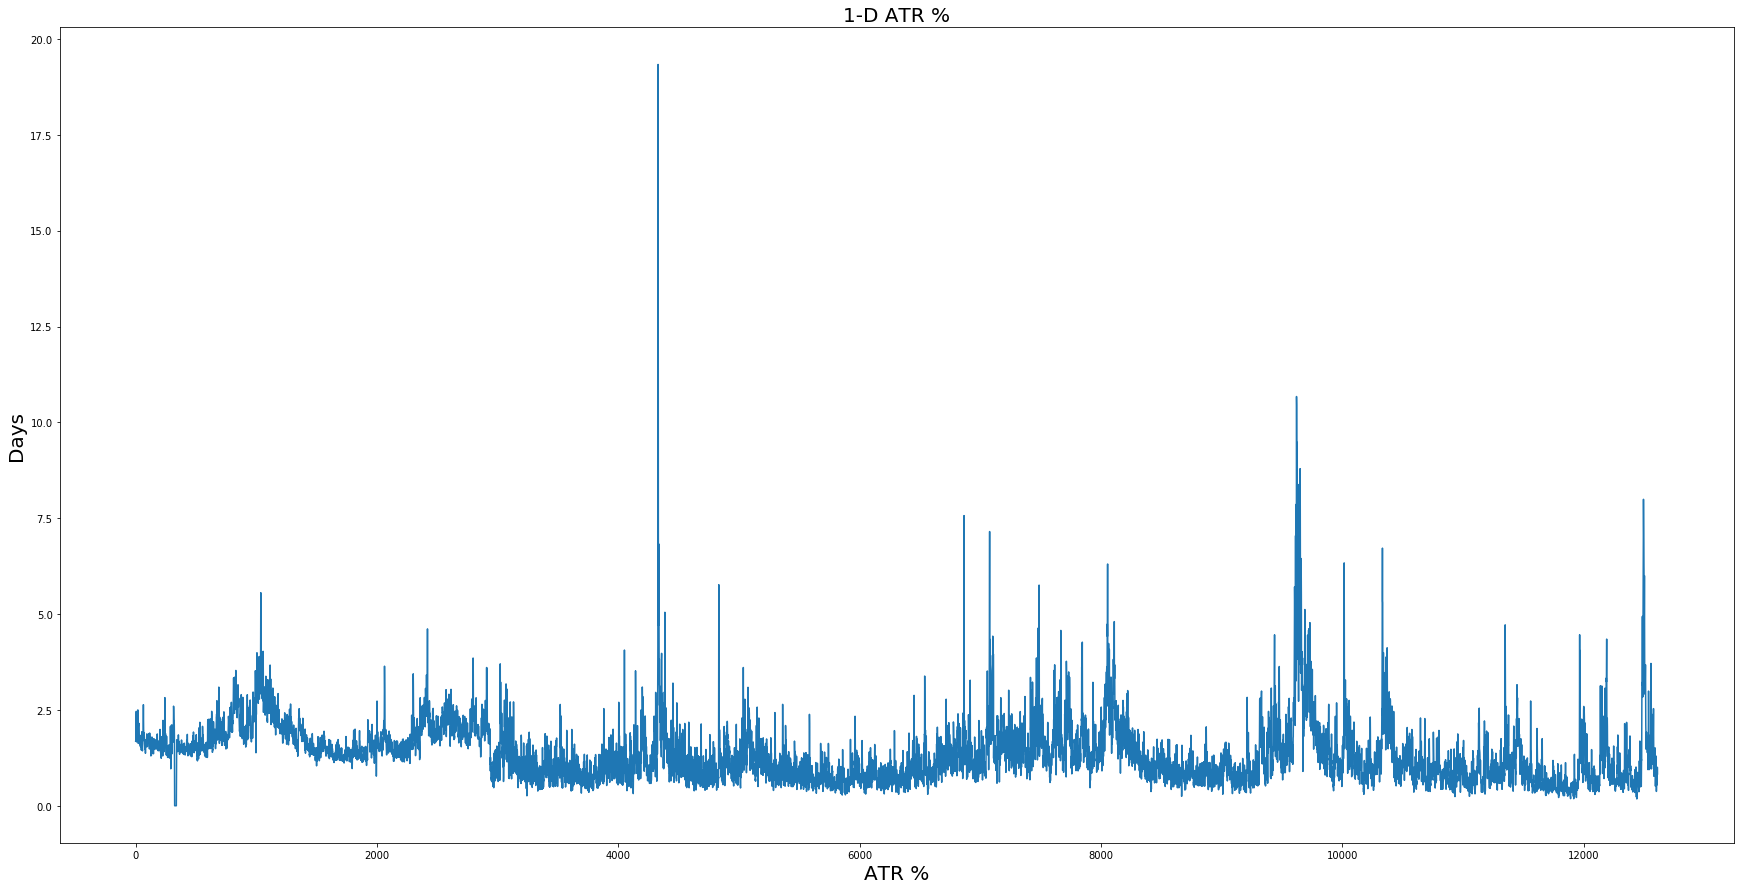

Years,,,,,,1,3,5,10,20,50
str5,str6,str6,str6,str6,str6,str6,str6,str6,str6,str6,str6
Days,5,10,15,20,60,250,750,1250,2500,5000,12500
ATR %,0.7943,0.7639,0.8005,0.7695,1.3274,1.4965,1.1544,1.0308,1.0593,1.3029,1.3697


In [45]:
plt.figure(figsize=(30,15))
plt.plot(data_atr['1-D ATR %'])
plt.title('1-D ATR %', fontsize=20)
plt.xlabel('ATR %', fontsize=20)
plt.ylabel('Days', fontsize=20)
plt.show()
#print(data_atr[-200:])


#Calculating ATR only works on daily data
atr_t = Table()
atr_t['Years'] = ['Days', 'ATR %']
atr_t[''] = ['5',round(data_atr['1-D ATR %'][-4:].mean(),4) ]
atr_t['   '] = ['10',round(data_atr['1-D ATR %'][-9:].mean(),4) ]
atr_t['    '] = ['15',round(data_atr['1-D ATR %'][-14:].mean(),4) ] 
atr_t[' '] = ['20',round(data_atr['1-D ATR %'][-19:].mean(),4) ]
atr_t['  '] = ['60',round(data_atr['1-D ATR %'][-59:].mean(),4) ]
atr_t['1'] = ['250',round(data_atr['1-D ATR %'][-249:].mean(),4) ] 
atr_t['3'] = ['750',round(data_atr['1-D ATR %'][-749:].mean(),4) ]
atr_t['5'] = ['1250',round(data_atr['1-D ATR %'][-1249:].mean(),4) ]
atr_t['10'] = ['2500',round(data_atr['1-D ATR %'][-2499:].mean(),4) ]
atr_t['20'] = ['5000',round(data_atr['1-D ATR %'][-4999:].mean(),4) ]
atr_t['50'] = ['12500',round(data_atr['1-D ATR %'][-12499:].mean(),4) ] 

atr_t